In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3rd assigmnet

1. Ames housing data

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

In [4]:
data1 = pd.read_csv('AmesHousing.csv')

In [5]:
data1

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
data1.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
data1.select_dtypes(include=['object']).describe()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [12]:
numeric_attributes = data1.select_dtypes(include=[np.number]).columns
data1[numeric_attributes] = np.log1p(data1[numeric_attributes])

In [13]:
data1[numeric_attributes]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.693147,20.081384,3.044522,4.955827,10.366309,1.945910,1.791759,7.581210,7.581210,4.727388,...,5.351858,4.143135,0.0,0.0,0.000000,0.0,0.000000,1.791759,7.606387,12.278398
1,1.098612,20.081477,3.044522,4.394449,9.360741,1.791759,1.945910,7.581720,7.581720,0.000000,...,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,1.945910,7.606387,11.561725
2,1.386294,20.081479,3.044522,4.406719,9.565775,1.945910,1.945910,7.580189,7.580189,4.691348,...,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,1.945910,7.606387,12.055256
3,1.609438,20.081483,3.044522,4.543295,9.320181,2.079442,1.791759,7.585281,7.585281,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.609438,7.606387,12.404928
4,1.791759,20.082910,4.110874,4.317488,9.534668,1.791759,1.791759,7.599902,7.600402,0.000000,...,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,1.386294,7.606387,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7.981733,20.643438,4.394449,3.637586,8.979417,1.945910,1.945910,7.593374,7.593374,0.000000,...,4.795791,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.386294,7.604396,11.867104
2926,7.982075,20.643439,3.044522,NaN,9.092232,1.791759,1.791759,7.592870,7.592870,0.000000,...,5.105945,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.945910,7.604396,11.782960
2927,7.982416,20.643573,4.454347,4.143135,9.253591,1.791759,1.791759,7.597396,7.597396,0.000000,...,4.394449,3.496508,0.0,0.0,0.000000,0.0,6.552508,2.079442,7.604396,11.790565
2928,7.982758,20.644331,3.044522,4.356709,9.211440,1.791759,1.791759,7.588324,7.588830,0.000000,...,5.484797,3.663562,0.0,0.0,0.000000,0.0,0.000000,1.609438,7.604396,12.043560


In [14]:
numeric_attributes

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [19]:
data1.duplicated().sum()

0

In [18]:
data1.drop_duplicates(inplace=True)

In [24]:
data1[numeric_attributes].isnull().sum()

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [25]:
data1[numeric_attributes] = data1[numeric_attributes].fillna(data1[numeric_attributes].median())

In [26]:
data1[numeric_attributes].isnull().sum()

Order              0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [27]:
scaler = StandardScaler()
data1[numeric_attributes] = scaler.fit_transform(data1[numeric_attributes])

In [28]:
data1[numeric_attributes]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,-6.389065,-1.005203,-1.123961,2.350438,2.493250,0.034742,-0.435072,-0.367121,-1.162551,1.013354,...,1.118190,0.838560,-0.426596,-0.11256,-0.308508,-0.066576,-0.188961,-0.232268,1.677978,0.631690
1,-5.977476,-1.004857,-1.123961,0.601506,0.525278,-0.708726,0.456595,-0.334030,-1.114142,-0.791606,...,0.962647,-1.085421,-0.426596,-0.11256,2.982871,-0.066576,-0.188961,0.122300,1.677978,-1.126954
2,-5.685450,-1.004850,-1.123961,0.639732,0.926544,0.034742,0.456595,-0.433353,-1.259443,0.999594,...,1.359163,0.591411,-0.426596,-0.11256,-0.308508,-0.066576,7.432602,0.122300,1.677978,0.084121
3,-5.458936,-1.004836,-1.123961,1.065224,0.445898,0.678763,-0.435072,-0.102867,-0.775968,-0.791606,...,-0.946931,-1.085421,-0.426596,-0.11256,-0.308508,-0.066576,-0.188961,-0.651632,1.677978,0.942181
4,-5.273861,-0.999518,0.413138,0.361739,0.865665,-0.708726,-0.435072,0.846134,0.659859,-0.791606,...,1.121830,0.565605,-0.426596,-0.11256,-0.308508,-0.066576,-0.188961,-1.164893,1.677978,0.327063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.009595,1.088299,0.821900,-1.756447,-0.221003,0.034742,0.456595,0.422435,-0.007493,-0.791606,...,0.903620,-1.085421,-0.426596,-0.11256,-0.308508,-0.066576,-0.188961,-1.164893,-1.360457,-0.377584
2926,1.009942,1.088303,-1.123961,0.101970,-0.000214,-0.708726,-0.435072,0.389728,-0.055341,-0.791606,...,1.023300,-1.085421,-0.426596,-0.11256,-0.308508,-0.066576,-0.188961,0.122300,-1.360457,-0.584065
2927,1.010289,1.088804,0.908240,-0.181446,0.315578,-0.708726,-0.435072,0.683500,0.374425,-0.791606,...,0.748755,0.538281,-0.426596,-0.11256,-0.308508,-0.066576,5.104940,0.429440,-1.360457,-0.565404
2928,1.010635,1.091626,-1.123961,0.483928,0.233084,-0.708726,-0.435072,0.094620,-0.438995,-0.791606,...,1.169487,0.615857,-0.426596,-0.11256,-0.308508,-0.066576,-0.188961,-0.651632,-1.360457,0.055420


In [29]:
min_max_scaler = MinMaxScaler()
data1[numeric_attributes] = min_max_scaler.fit_transform(data1[numeric_attributes])

In [30]:
data1[numeric_attributes]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.000000,0.000000,0.000000,0.701482,0.625492,0.734867,0.682606,0.645839,0.168784,0.640708,...,0.736975,0.626732,0.0,0.0,0.000000,0.0,0.000000,0.586928,1.0,0.691991
1,0.055620,0.000143,0.000000,0.490307,0.428656,0.644443,0.778385,0.653010,0.185615,0.000000,...,0.681466,0.000000,0.0,0.0,0.754311,0.0,0.000000,0.669282,1.0,0.516252
2,0.095083,0.000146,0.000000,0.494922,0.468791,0.734867,0.778385,0.631485,0.135096,0.635823,...,0.822970,0.546224,0.0,0.0,0.000000,0.0,0.968436,0.669282,1.0,0.637274
3,0.125692,0.000152,0.000000,0.546298,0.420716,0.813196,0.682606,0.703107,0.303193,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.489523,1.0,0.723018
4,0.150702,0.002352,0.483003,0.461356,0.462701,0.644443,0.682606,0.908772,0.802409,0.000000,...,0.738274,0.537818,0.0,0.0,0.000000,0.0,0.000000,0.370310,1.0,0.661550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.999813,0.866088,0.611449,0.205595,0.354013,0.734867,0.778385,0.816949,0.570380,0.000000,...,0.660402,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.370310,0.0,0.591136
2926,0.999860,0.866090,0.000000,0.429990,0.376096,0.644443,0.682606,0.809861,0.553744,0.000000,...,0.703112,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.669282,0.0,0.570503
2927,0.999906,0.866297,0.638580,0.395769,0.407682,0.644443,0.682606,0.873527,0.703168,0.000000,...,0.605135,0.528917,0.0,0.0,0.000000,0.0,0.672671,0.740620,0.0,0.572367
2928,0.999953,0.867464,0.000000,0.476110,0.399431,0.644443,0.682606,0.745906,0.420354,0.000000,...,0.755281,0.554187,0.0,0.0,0.000000,0.0,0.000000,0.489523,0.0,0.634405


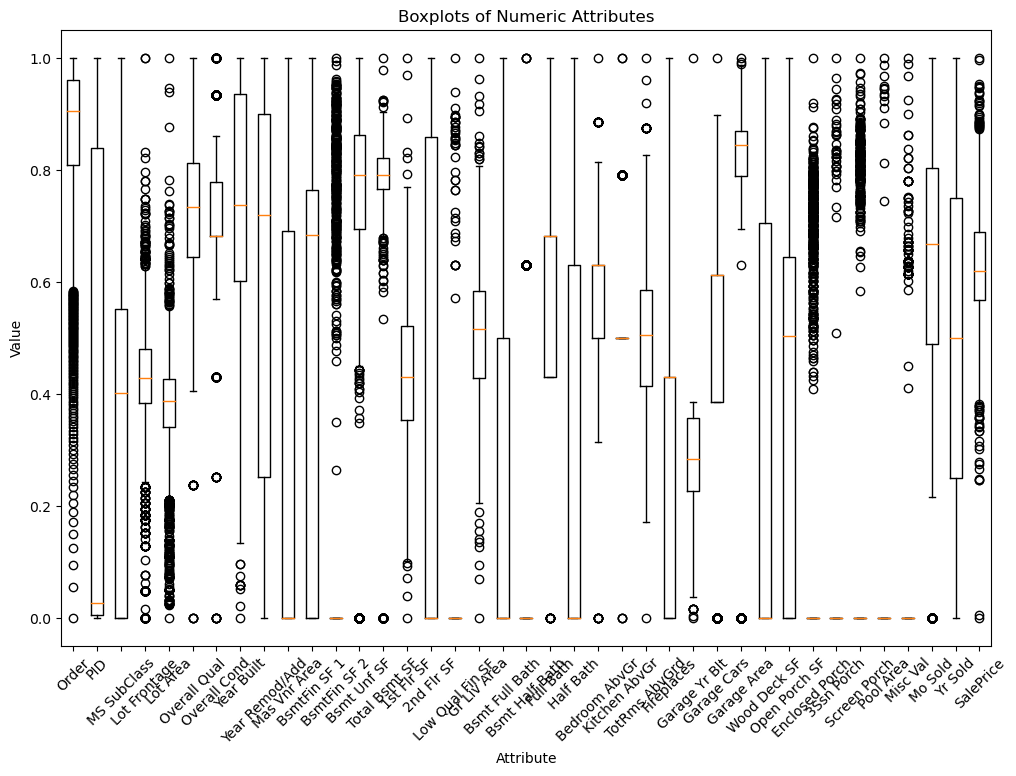

In [32]:
plt.figure(figsize=(12, 8))  # Set figure size
plt.boxplot(data1[numeric_attributes].values, labels=numeric_attributes)
plt.title("Boxplots of Numeric Attributes")
plt.xlabel("Attribute")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [34]:
outlier_indices = []
for col in numeric_attributes:
    mean = data1[col].mean()
    std = data1[col].std()
    outliers = data1[(data1[col] > mean + 3 * std) | (data1[col] < mean - 3 * std)]
    outlier_indices.extend(outliers.index)

In [38]:
data1.drop(outlier_indices, inplace=True)

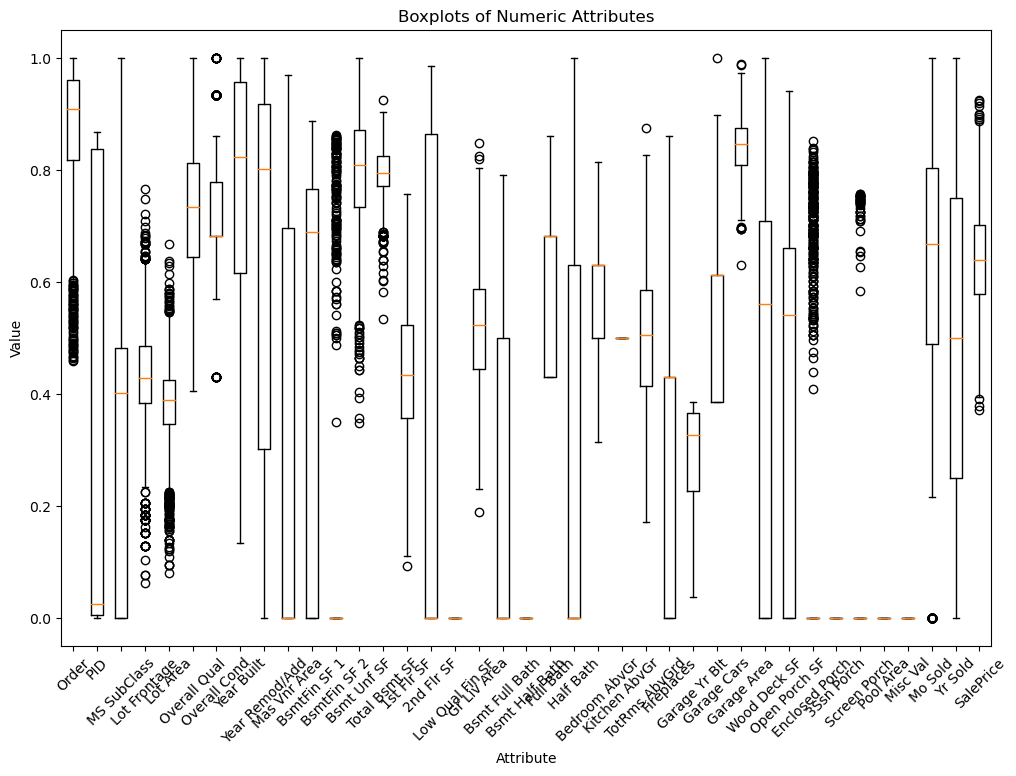

In [39]:
plt.figure(figsize=(12, 8))  # Set figure size
plt.boxplot(data1[numeric_attributes].values, labels=numeric_attributes)
plt.title("Boxplots of Numeric Attributes")
plt.xlabel("Attribute")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

2. iris dataset

In [40]:
data2 = pd.read_csv('Iris_Data.csv')

In [41]:
data2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
data2.shape

(150, 5)

In [45]:
data2.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
data2['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [48]:
data2['species'].replace(data2['species']=='Iris-', data2['species']=='')

AttributeError: 'Series' object has no attribute '_replace_columnwise'

In [50]:
data2['species'] =  data2['species'].str.replace('Iris-', '')

In [52]:
data2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
data2['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [54]:
data2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
irisdata2 = data2.describe()
irisdata2.loc['range'] = irisdata2.loc['max'] - irisdata2.loc['min']
data = ['mean','25%','50%','75%','range']
irisdata2 =irisdata2.loc[data]
irisdata2.rename({'50%' : 'median'}, inplace = True)

In [58]:
irisdata2

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [59]:
irisdata2_mean = data2.groupby('species').mean()
irisdata2_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [60]:
irisdata2_median = data2.groupby('species').median()
irisdata2_median

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


Text(0.5, 1.0, 'Sepal Length vs Seplal Width')

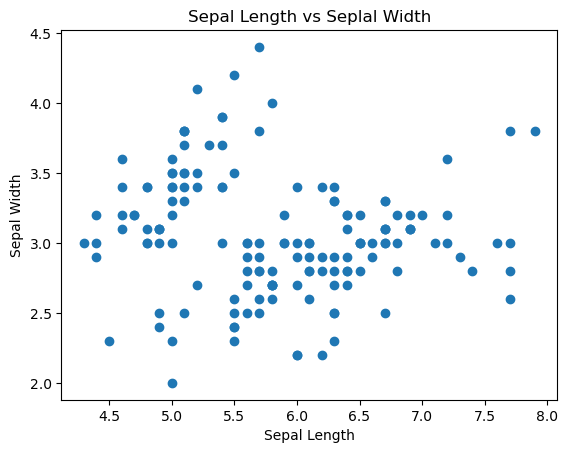

In [62]:
plt.scatter(data2['sepal_length'], data2['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Seplal Width')

Text(0.5, 1.0, 'Sepal Length')

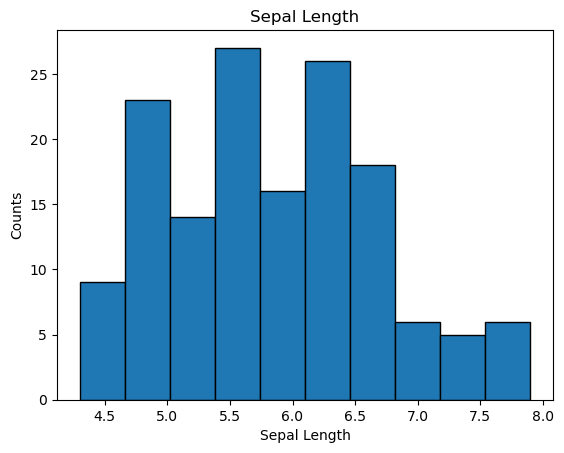

In [67]:
plt.hist(data2['sepal_length'], bins = 10,edgecolor = 'black')
plt.xlabel('Sepal Length')
plt.ylabel('Counts')
plt.title('Sepal Length')

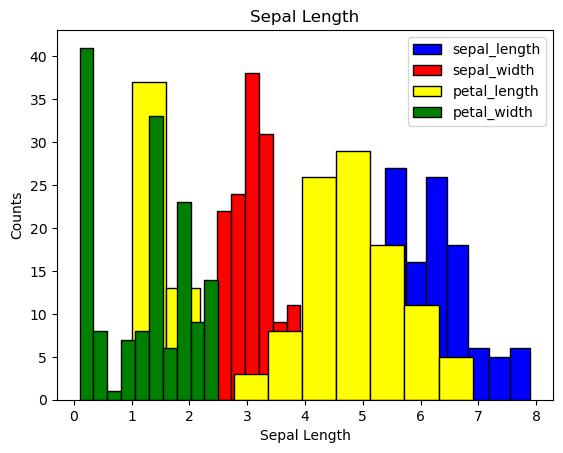

In [72]:
plt.hist(data2['sepal_length'], bins = 10,color = 'blue',edgecolor = 'black')
plt.hist(data2['sepal_width'], bins = 10,color = 'red',edgecolor = 'black')
plt.hist(data2['petal_length'], bins = 10,color = 'yellow',edgecolor = 'black')
plt.hist(data2['petal_width'], bins = 10,color = 'green',edgecolor = 'black')
plt.xlabel('Sepal Length')
plt.ylabel('Counts')
plt.title('Sepal Length')
plt.legend(['sepal_length','sepal_width','petal_length','petal_width'])

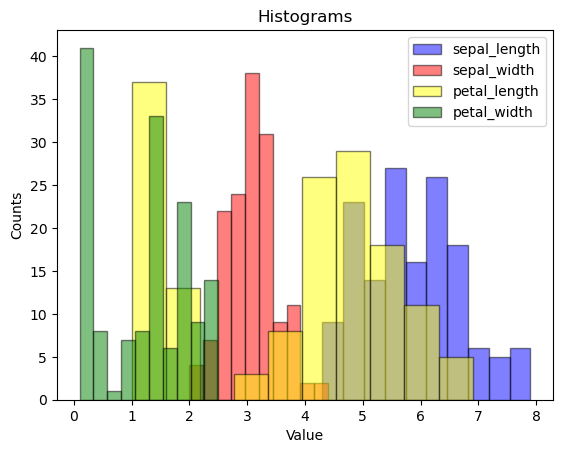

In [73]:
import matplotlib.pyplot as plt

# Plot histograms
plt.hist(data2['sepal_length'], bins=10, color='blue', edgecolor='black', alpha=0.5)
plt.hist(data2['sepal_width'], bins=10, color='red', edgecolor='black', alpha=0.5)
plt.hist(data2['petal_length'], bins=10, color='yellow', edgecolor='black', alpha=0.5)
plt.hist(data2['petal_width'], bins=10, color='green', edgecolor='black', alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Histograms')

# Create custom legend
plt.legend(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.show()


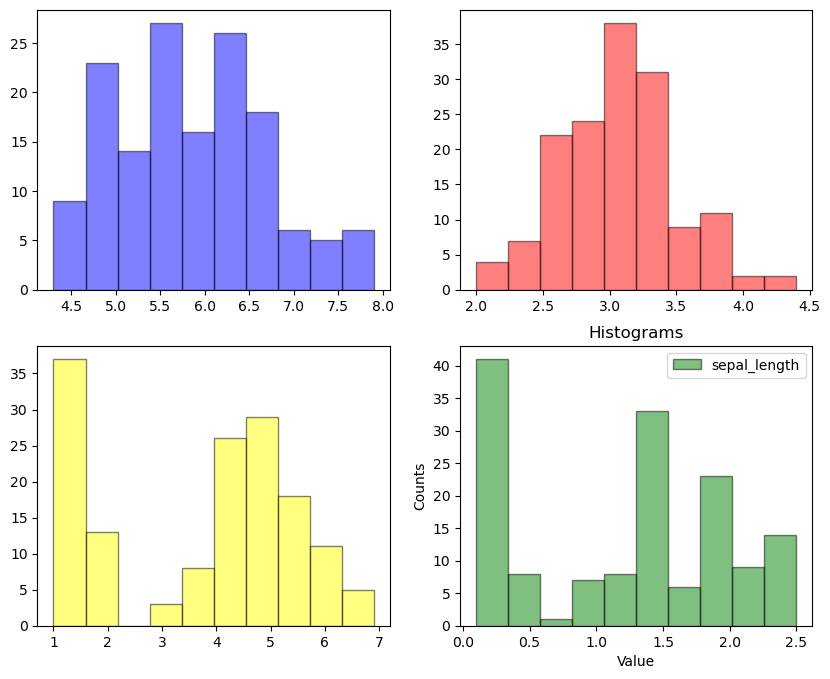

In [76]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# Plot histograms
axs[0,0].hist(data2['sepal_length'], bins=10, color='blue', edgecolor='black', alpha=0.5)
axs[0,1].hist(data2['sepal_width'], bins=10, color='red', edgecolor='black', alpha=0.5)
axs[1,0].hist(data2['petal_length'], bins=10, color='yellow', edgecolor='black', alpha=0.5)
axs[1,1].hist(data2['petal_width'], bins=10, color='green', edgecolor='black', alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Histograms')

# Create custom legend
plt.legend(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.show()


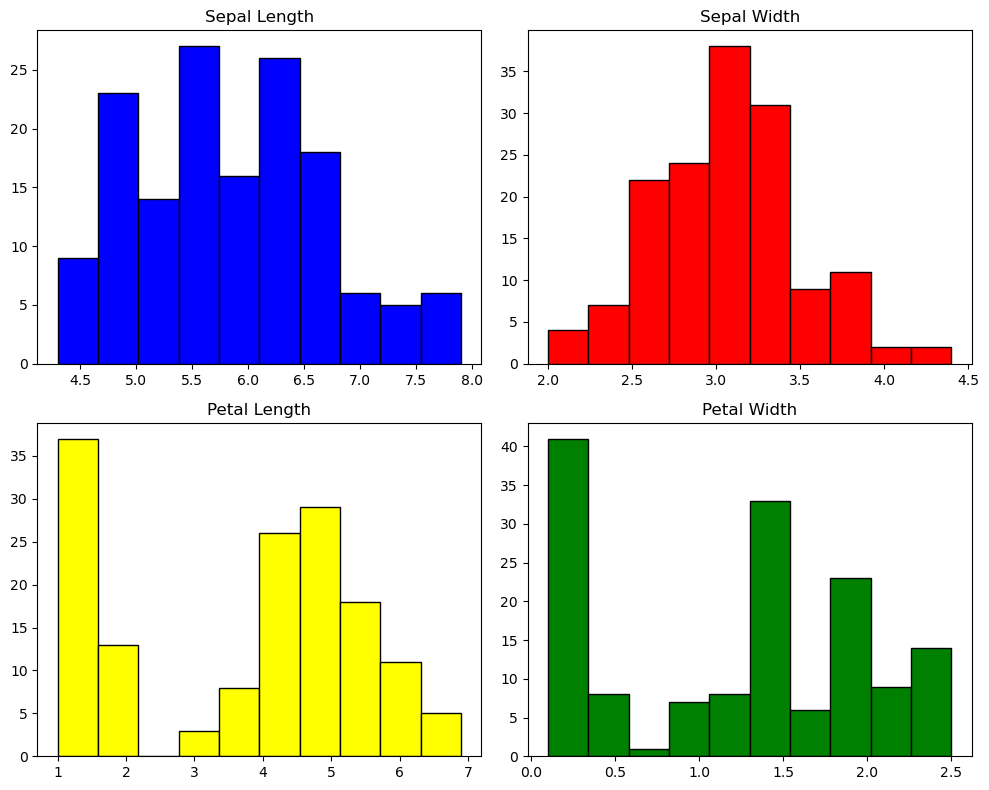

In [77]:
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms for each feature
axs[0, 0].hist(data2['sepal_length'], bins=10, color='blue', edgecolor='black')
axs[0, 0].set_title('Sepal Length')

axs[0, 1].hist(data2['sepal_width'], bins=10, color='red', edgecolor='black')
axs[0, 1].set_title('Sepal Width')

axs[1, 0].hist(data2['petal_length'], bins=10, color='yellow', edgecolor='black')
axs[1, 0].set_title('Petal Length')

axs[1, 1].hist(data2['petal_width'], bins=10, color='green', edgecolor='black')
axs[1, 1].set_title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
